In [1]:
!pip install requests==2.31.0
!pip install datasets
!pip install accelerate
!pip install transformers
!pip install --upgrade transformers
!pip install bitsandbytes
!pip install trl
!pip install huggingface_hub
!pip install emoji==0.6.0
!pip install pyLDAvis==3.4.1
!pip install gensim==4.3.0
from datasets import load_dataset

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
import torch
import time
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer, AutoModelForCausalLM
from huggingface_hub import notebook_login
from transformers import BitsAndBytesConfig

In [5]:

# Read in the dataset
df = pd.read_csv('reddit_posts.csv')

# Display the first few rows of the dataset
df.head()


,title,score,upvote_ratio,created_utc,selftext,subreddit,author,media_only,permalink,num_comments,upvotes,downvotes,upvotes/subscribers
0,I feel hopeless.,157,0.99,1709292907.0,"Hi, I’m 24F. I stay home 24/7 , everyday. I do...",MentalHealthSupport,Odd-View-667,False,/r/MentalHealthSupport/comments/1b3s6ad/i_feel...,154.0,158.585859,1.585859,0.003478
1,What changes your negative thoughts/ has made ...,47,1.0,1709444438.0,I am learning that affirmations and the like c...,MentalHealthSupport,Bananasloog1998,False,/r/MentalHealthSupport/comments/1b59lzz/what_c...,21.0,47.000000,0.000000,0.001031
2,what is the point of living?,46,0.94,1709354038.0,\ncontent warning for suicide.\n\n\n\nI dont u...,MentalHealthSupport,penjamincranklin,False,/r/MentalHealthSupport/comments/1b4fkko/what_i...,24.0,48.936170,2.936170,0.001073
3,I need a hug,23,0.9,1709556961.0,I wanna end me.,MentalHealthSupport,Positive-Parthlow,False,/r/MentalHealthSupport/comments/1b6a8vz/i_need...,26.0,25.555556,2.555556,0.000560
4,What are you like after a hug,22,1.0,1709738303.0,If I hug someone I just try my best not to cry...,MentalHealthSupport,itsRileyigitbanned,False,/r/MentalHealthSupport/comments/1b8299d/what_a...,17.0,22.000000,0.000000,0.000482


In [6]:
from transformers import AutoTokenizer, AutoModel
from huggingface_hub import interpreter_login
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): ········
Add token as git credential? (Y/n) Y
Token is valid (permission

In [7]:
from transformers import AutoTokenizer, pipeline

# Load the sentiment analysis pipeline and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

input_text = "Hi, I’m 24F. I stay home 24/7 , everyday. I don’t have friends. I don’t have a bf or anything talking stage nothing. I don’t talk to people online either. My phone is pretty dry too. I don’t talk to people irl either. I could not get into uni as I was so depressed back then and I couldn’t study or focus. I wanted to die. I tried , didn’t succeed ofc.I just don’t know what to do.I’m from a conservative family. Everyone’s biggest goal is to get married and have a family. It isn’t my dream. But my parents are keep trying to set me up with someone. My family members talk to me like I’m 50 and single.I don’t even know where I’m going with telling these. I thought I was not depressed anymore. I was feeling okay. Out of nowhere I felt so sad now. Idk why, but I just did. I feel lonely too. I just wanna cry.What do I do?"
#input_text = df['selftext'][16]
# Tokenize the text
# Check the maximum length of the tokenizer
max_length = tokenizer.model_max_length
print(f"Maximum length of the tokenizer for model '{model_name}': {max_length}")
result = sentiment_pipeline(input_text)
print(result)

/Users/samantharivas/opt/anaconda3/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceC

Maximum length of the tokenizer for model 'cardiffnlp/twitter-roberta-base-sentiment-latest': 1000000000000000019884624838656
[{'label': 'negative', 'score': 0.8390902876853943}]


In [8]:

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Enhanced preprocess function
def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""

    # Remove newline characters and excessive whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stop words and punctuation
    #tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens into a single string
    cleaned_text = ' '.join(tokens)

    # Remove spaces before punctuation
    cleaned_text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', cleaned_text)

    # Remove trailing punctuation
    cleaned_text = re.sub(r'([?.!"](?:\s|$))', r'\1', cleaned_text)

    return cleaned_text

# Convert non-string values to empty strings
df['selftext'] = df['selftext'].astype(str)

# Apply preprocessing to the DataFrame and replace the original 'selftext' column
df['selftext'] = df['selftext'].apply(preprocess_text)

# Display the first few rows of the DataFrame with the cleaned text
print(df[['selftext']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            selftext
0  hi , i ’ m 24f. i stay home 24/7 , everyday. i...
1  i am learning that affirmation and the like ca...
2  content warning for suicide. i dont understand...
3                                   i wan na end me.
4  if i hug someone i just try my best not to cry...


In [9]:
from transformers import AutoTokenizer

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Find the maximum token length
max_token_length = 0
count = 0
for text in df['selftext']:
    tokens = tokenizer.encode(text)
    count +=1
    if len(tokens) > max_token_length:
        max_token_length = len(tokens)
        print(f"New maximum token length: {max_token_length}")

    if (count) % 100 == 0:
        print(f"Processed {count+ 1}/{len(df)} rows")

print(f"The highest token length in df['selftext'] is {max_token_length} tokens.")



/Users/samantharivas/opt/anaconda3/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


New maximum token length: 249
New maximum token length: 360
New maximum token length: 681
New maximum token length: 837
New maximum token length: 1003
New maximum token length: 1345
New maximum token length: 1458
New maximum token length: 1931
Processed 101/3972 rows
New maximum token length: 2577
Processed 201/3972 rows
Processed 301/3972 rows
Processed 401/3972 rows
Processed 501/3972 rows
Processed 601/3972 rows
Processed 701/3972 rows
Processed 801/3972 rows
Processed 901/3972 rows
New maximum token length: 7484
Processed 1001/3972 rows
Processed 1101/3972 rows
Processed 1201/3972 rows
Processed 1301/3972 rows
Processed 1401/3972 rows
Processed 1501/3972 rows
Processed 1601/3972 rows
Processed 1701/3972 rows
Processed 1801/3972 rows
Processed 1901/3972 rows
Processed 2001/3972 rows
Processed 2101/3972 rows
Processed 2201/3972 rows
Processed 2301/3972 rows
Processed 2401/3972 rows
Processed 2501/3972 rows
Processed 2601/3972 rows
Processed 2701/3972 rows
Processed 2801/3972 rows
Pro

In [10]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

results = []
max_length = 512  # Explicitly set the maximum length to 512 tokens


for i, text in enumerate(df['selftext']):
    #print(i)
    # Tokenize the text and truncate if necessary
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length) # bug
    result = sentiment_pipeline(tokenizer.decode(tokens, skip_special_tokens=True))[0]
    results.append(result)
    if (i + 1) % 100 == 0:
        print(f"Processed {i + 1}/{len(df)} rows")

# Add the results to the DataFrame
df['sentiment'] = [result['label'] for result in results]
df['sentiment_score'] = [result['score'] for result in results]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Processed 100/3972 rows
Processed 200/3972 rows
Processed 300/3972 rows
Processed 400/3972 rows
Processed 500/3972 rows
Processed 600/3972 rows
Processed 700/3972 rows
Processed 800/3972 rows
Processed 900/3972 rows
Processed 1000/3972 rows
Processed 1100/3972 rows
Processed 1200/3972 rows
Processed 1300/3972 rows
Processed 1400/3972 rows
Processed 1500/3972 rows
Processed 1600/3972 rows
Processed 1700/3972 rows
Processed 1800/3972 rows
Processed 1900/3972 rows
Processed 2000/3972 rows
Processed 2100/3972 rows
Processed 2200/3972 rows
Processed 2300/3972 rows
Processed 2400/3972 rows
Processed 2500/3972 rows
Processed 2600/3972 rows
Processed 2700/3972 rows
Processed 2800/3972 rows
Processed 2900/3972 rows
Processed 3000/3972 rows
Processed 3100/3972 rows
Processed 3200/3972 rows
Processed 3300/3972 rows
Processed 3400/3972 rows
Processed 3500/3972 rows
Processed 3600/3972 rows
Processed 3700/3972 rows
Processed 3800/3972 rows
Processed 3900/3972 rows


In [11]:
df.head()

,title,score,upvote_ratio,created_utc,selftext,subreddit,author,media_only,permalink,num_comments,upvotes,downvotes,upvotes/subscribers,sentiment,sentiment_score
0,I feel hopeless.,157,0.99,1709292907.0,"hi , i ’ m 24f. i stay home 24/7 , everyday. i...",MentalHealthSupport,Odd-View-667,False,/r/MentalHealthSupport/comments/1b3s6ad/i_feel...,154.0,158.585859,1.585859,0.003478,negative,0.846263
1,What changes your negative thoughts/ has made ...,47,1.0,1709444438.0,i am learning that affirmation and the like ca...,MentalHealthSupport,Bananasloog1998,False,/r/MentalHealthSupport/comments/1b59lzz/what_c...,21.0,47.000000,0.000000,0.001031,neutral,0.528207
2,what is the point of living?,46,0.94,1709354038.0,content warning for suicide. i dont understand...,MentalHealthSupport,penjamincranklin,False,/r/MentalHealthSupport/comments/1b4fkko/what_i...,24.0,48.936170,2.936170,0.001073,negative,0.935134
3,I need a hug,23,0.9,1709556961.0,i wan na end me.,MentalHealthSupport,Positive-Parthlow,False,/r/MentalHealthSupport/comments/1b6a8vz/i_need...,26.0,25.555556,2.555556,0.000560,negative,0.870343
4,What are you like after a hug,22,1.0,1709738303.0,if i hug someone i just try my best not to cry...,MentalHealthSupport,itsRileyigitbanned,False,/r/MentalHealthSupport/comments/1b8299d/what_a...,17.0,22.000000,0.000000,0.000482,neutral,0.480981


In [13]:
df.to_csv('sentiment_analysis.csv')

In [14]:

file_path = "sentiment_analysis.csv"
# Read in the dataset
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,title,score,upvote_ratio,created_utc,selftext,subreddit,author,media_only,permalink,num_comments,upvotes,downvotes,upvotes/subscribers,sentiment,sentiment_score
0,0,I feel hopeless.,157,0.99,1709292907.0,"hi , i ’ m 24f. i stay home 24/7 , everyday. i...",MentalHealthSupport,Odd-View-667,False,/r/MentalHealthSupport/comments/1b3s6ad/i_feel...,154.0,158.585859,1.585859,0.003478,negative,0.846263
1,1,What changes your negative thoughts/ has made ...,47,1.0,1709444438.0,i am learning that affirmation and the like ca...,MentalHealthSupport,Bananasloog1998,False,/r/MentalHealthSupport/comments/1b59lzz/what_c...,21.0,47.000000,0.000000,0.001031,neutral,0.528207
2,2,what is the point of living?,46,0.94,1709354038.0,content warning for suicide. i dont understand...,MentalHealthSupport,penjamincranklin,False,/r/MentalHealthSupport/comments/1b4fkko/what_i...,24.0,48.936170,2.936170,0.001073,negative,0.935134
3,3,I need a hug,23,0.9,1709556961.0,i wan na end me.,MentalHealthSupport,Positive-Parthlow,False,/r/MentalHealthSupport/comments/1b6a8vz/i_need...,26.0,25.555556,2.555556,0.000560,negative,0.870343
4,4,What are you like after a hug,22,1.0,1709738303.0,if i hug someone i just try my best not to cry...,MentalHealthSupport,itsRileyigitbanned,False,/r/MentalHealthSupport/comments/1b8299d/what_a...,17.0,22.000000,0.000000,0.000482,neutral,0.480981


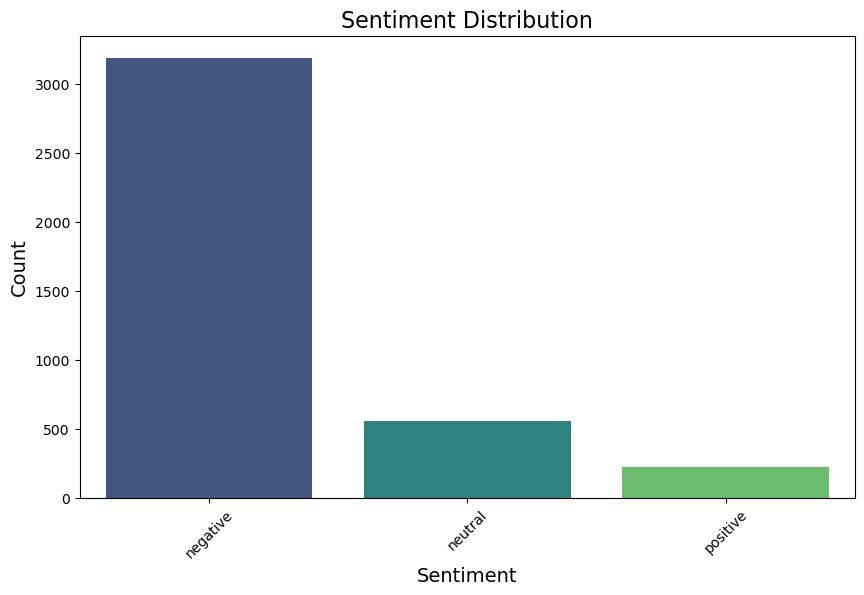

In [15]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Grouping text model

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""

    # Remove newline characters and excessive whitespace
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove stop words and punctuation
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens into a single string
    cleaned_text = ' '.join(tokens)


    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samantharivas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df['selftext'] = df['selftext'].apply(preprocess_text)
df.head()


,Unnamed: 0,title,score,upvote_ratio,created_utc,selftext,subreddit,author,media_only,permalink,num_comments,upvotes,downvotes,upvotes/subscribers,sentiment,sentiment_score
0,0,I feel hopeless.,157,0.99,1709292907.0,hi stay home everyday friend bf anything talki...,MentalHealthSupport,Odd-View-667,False,/r/MentalHealthSupport/comments/1b3s6ad/i_feel...,154.0,158.585859,1.585859,0.003478,negative,0.846263
1,1,What changes your negative thoughts/ has made ...,47,1.0,1709444438.0,learning affirmation like change inner thought...,MentalHealthSupport,Bananasloog1998,False,/r/MentalHealthSupport/comments/1b59lzz/what_c...,21.0,47.000000,0.000000,0.001031,neutral,0.528207
2,2,what is the point of living?,46,0.94,1709354038.0,content warning suicide dont understand always...,MentalHealthSupport,penjamincranklin,False,/r/MentalHealthSupport/comments/1b4fkko/what_i...,24.0,48.936170,2.936170,0.001073,negative,0.935134
3,3,I need a hug,23,0.9,1709556961.0,wan na end,MentalHealthSupport,Positive-Parthlow,False,/r/MentalHealthSupport/comments/1b6a8vz/i_need...,26.0,25.555556,2.555556,0.000560,negative,0.870343
4,4,What are you like after a hug,22,1.0,1709738303.0,hug someone try best cry think everything done...,MentalHealthSupport,itsRileyigitbanned,False,/r/MentalHealthSupport/comments/1b8299d/what_a...,17.0,22.000000,0.000000,0.000482,neutral,0.480981


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(df['selftext'])

# Convert the data into gensim format
texts = [text.split() for text in df['selftext']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Fit the LDA model using gensim
lda_gensim = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Visualize the topics
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(lda_gensim, corpus, dictionary, mds='tsne')
pyLDAvis.display(panel)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

### Model building

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    # Get the embeddings from the [CLS] token
    cls_embeddings = outputs.last_hidden_state[:, 0, :].squeeze().detach().numpy()
    return cls_embeddings

# Apply the function to the 'processed_text' column
df['bert_embeddings'] = df['selftext'].apply(get_bert_embeddings)

# Convert the embeddings to a suitable format for machine learning
X = np.stack(df['bert_embeddings'].values)

# Target variable
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Confirm encoded labels
print("Encoded labels:", np.unique(y))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1

# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=2000)
svm_model = SVC(random_state=42, probability=True)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Evaluate all models
results = {}
models = {
    "Logistic Regression": lr_model,
    "Support Vector Machine": svm_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "K-Nearest Neighbors": knn_model
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = evaluate_model(model, X_test, y_test)

# Create a DataFrame with the results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(results_df)



In [ ]:
results_df.to_csv('results_df_main.csv')

In [ ]:
# Bar chart for model performance
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(loc='lower right')
plt.show()


In [ ]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Generate word cloud for positive sentiments
positive_text = ' '.join(df[df['sentiment'] == 'positive']['selftext'])
generate_wordcloud(positive_text, 'Word Cloud for Positive Sentiments')


In [ ]:
# Generate word cloud for negative sentiments
negative_text = ' '.join(df[df['sentiment'] == 'negative']['selftext'])
generate_wordcloud(negative_text, 'Word Cloud for Negative Sentiments')

In [ ]:
# Generate word cloud for neutral sentiments
neutral_text = ' '.join(df[df['sentiment'] == 'neutral']['selftext'])
generate_wordcloud(neutral_text, 'Word Cloud for Neutral Sentiments')